<a href="https://colab.research.google.com/github/vanshika1804/CalculatingScreeenTimeofActors/blob/main/CalculatingScreenTimeofCharacters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import math
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from keras.utils import np_utils
from skimage.transform import resize

In [ ]:
#Read video extract frames and save them as images

count = 0
videoPath = '/content/drive/MyDrive/Colab Notebooks/Keras/Tom and jerry.mp4'
video = cv2.VideoCapture(videoPath)

#defining frame rate
frameRate = video.get(5)

x=1
while(video.isOpened()):
  frameId = video.get(1)
  ret, frame = video.read()
  if (ret != True):
    break
  if (frameId%math.floor(frameRate) == 0):
    filename = "frame%d.jpg"%count
    count+=1
    cv2.imwrite(filename,frame)

video.release()
print('Your frames are saved')

Your frames are saved


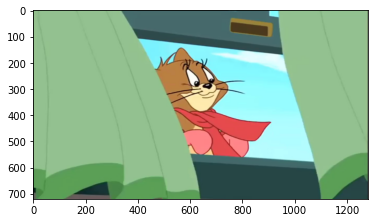

In [ ]:
img = plt.imread('frame0.jpg')   # reading image using its name
plt.imshow(img)

In [ ]:
#Now we have the frames so we will label a few images to train the model
# the classification that we will use would be 
# 0-neither tom nor Jerry 
# 1-for Jerry 
# 2- for Tom

#pre label targeted data file for learning of the model
trainedData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Keras/mapping.csv')
trainedData.head()

,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,2
3,frame3.jpg,2
4,frame4.jpg,2


In [ ]:
# Creating array of and from training data inorder to train our model

X_train = []

for img_name in trainedData.Image_ID:
  img = plt.imread(''+ img_name)
  X_train.append(img)

X_train = np.array(X_train)
X_train.shape[0]

298

In [ ]:
#Creating array of target values for the training data

Y_train = trainedData.Class

#hot encod data as it is categorical in nature

dummy_Y_train = np_utils.to_categorical(Y_train)

In [ ]:
# we will have to resize the image to put it into in the VGG 16 pretrained model as it takes image of shape 224*224*3

image = []
print(X_train.shape[0])
for i in range(0,X_train.shape[0]):
    a = resize(X_train[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)

X_train = np.array(image)
X_train.shape[0]

298


298

In [ ]:
#importing the ML model and pre processor that we will use to train the data 

from keras.applications.vgg16 import preprocess_input
X_train = preprocess_input(X_train)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, dummy_Y_train, test_size=0.2, random_state=42)

In [ ]:
#Building the model 

from keras.models import Sequential 
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    # include_top=False to remove the top layer

In [ ]:
X_train = base_model.predict(X_train)
X_test = base_model.predict(X_test)
X_train.shape, X_test.shape

((238, 7, 7, 512), (60, 7, 7, 512))

In [ ]:
#reshaping the above data to 1D to pass it to our neural network

X_train = X_train.reshape(238, 7*7*512)
X_test = X_test.reshape(60, 7*7*512)

In [ ]:
#making all the images zero centered to make the model converge faster 

X_train = X_train/X_train.max()
X_test = X_test/X_train.max()

In [ ]:
#i Building a model

model = Sequential()
model.add(InputLayer((7*7*512))) #input layer
model.add(Dense(units = 1024, activation='sigmoid'))  #hidden layers
model.add(Dense(3, activation='softmax'))  #output layer

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3075      
Total params: 25,694,211
Trainable params: 25,694,211
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# ii. Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#iii Training the model

model.fit(X_train, Y_train, epochs=800, validation_data=(X_test,Y_test))

Epoch 1/800
8/8 [==============================] - 2s 184ms/step - loss: 1.0348 - accuracy: 0.5254 - val_loss: 4.6837 - val_accuracy: 0.7333
Epoch 2/800
8/8 [==============================] - 1s 157ms/step - loss: 0.2864 - accuracy: 0.9544 - val_loss: 4.0693 - val_accuracy: 0.7167
Epoch 3/800
8/8 [==============================] - 1s 154ms/step - loss: 0.1167 - accuracy: 0.9872 - val_loss: 3.5243 - val_accuracy: 0.7833
Epoch 4/800
8/8 [==============================] - 1s 158ms/step - loss: 0.0683 - accuracy: 0.9908 - val_loss: 3.5163 - val_accuracy: 0.8167
Epoch 5/800
8/8 [==============================] - 1s 158ms/step - loss: 0.0417 - accuracy: 0.9964 - val_loss: 3.6335 - val_accuracy: 0.8000
Epoch 6/800
8/8 [==============================] - 1s 155ms/step - loss: 0.0364 - accuracy: 0.9891 - val_loss: 3.3485 - val_accuracy: 0.8000
Epoch 7/800
8/8 [==============================] - 1s 157ms/step - loss: 0.0268 - accuracy: 0.9980 - val_loss: 3.6420 - val_accuracy: 0.8000
Epoch 8/800
8